### preparation of two images

In [1]:
from qiskit import BasicAer,execute
from qmg_gen_subtract import qmg_gen_subtract
from image2neqrstr import neqr_info
from time import time
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from pprint import pprint
import pixiedust

Pixiedust database opened successfully


In [2]:
files = ['source-2-minuend.png', 'source-2-reduction.png']
shot_times=16
color_n = 3
state_length, all_quantum_states = neqr_info(color_n, files, 'source_img')
assist_n = 2
reg_counts = state_length+ assist_n+color_n

In [3]:
pprint(all_quantum_states[0])
pprint(all_quantum_states[1])
print(state_length)

['01000', '00001', '00010', '11111']
['10000', '01101', '00010', '00111']
5


In [4]:
# print(target_state_fir[:color_n][::-1] + target_state_sec[:color_n][::-1])

In [5]:
qr = QuantumRegister(reg_counts, 'qr')
circuit = QuantumCircuit(qr)
# for i in range(2*color_n, state_length+color_n):
#     circuit.h(qr[i])
# for target_state_fir,target_state_sec in zip(all_quantum_states[0],all_quantum_states[1]):
#     qmg_gen_subtract(circuit, qr, color_n, target_state_fir,target_state_sec,
#                                      state_length, reg_counts

In [6]:
# %%pixie_debugger


In [7]:
last_borrow_cur=reg_counts-1
borrow_cur=reg_counts-2
val_cur=2*color_n-1
for i in range(color_n):
    print(val_cur)
    circuit.cx(qr[last_borrow_cur],qr[val_cur])
    circuit.x(qr[val_cur-color_n])
    circuit.ccx(qr[val_cur-color_n],qr[val_cur],qr[borrow_cur])
    circuit.cx(qr[last_borrow_cur],qr[val_cur])
    circuit.ccx(qr[val_cur],qr[last_borrow_cur],qr[borrow_cur])
    circuit.x(qr[val_cur-color_n])
    circuit.cx(qr[val_cur-color_n],qr[val_cur])
    circuit.cx(qr[last_borrow_cur],qr[val_cur])
    circuit.reset(qr[last_borrow_cur])
    val_cur-=1
    tmp=last_borrow_cur
    last_borrow_cur=borrow_cur
    borrow_cur=tmp
    circuit.barrier()

5
4
3


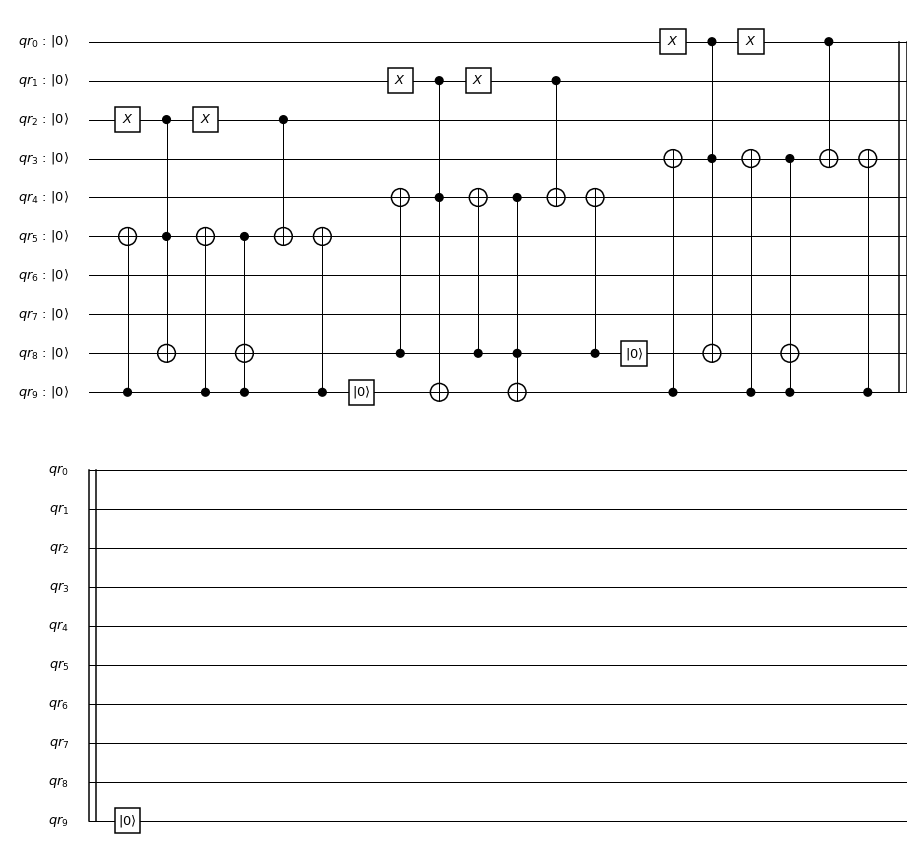

In [8]:
circuit.draw(output='mpl',scale=0.6,plot_barriers=False,filename='circuit-debug')

In [9]:
cr=ClassicalRegister(reg_counts,'cr')
circuit.add_register(cr)
circuit.measure(qr,cr)

In [10]:
backend=BasicAer.get_backend('qasm_simulator')
result=execute(circuit,backend,shots=shot_times).result()
counts=result.get_counts(circuit)
all_lst=list(counts.keys())
print(all_lst) #这是经过量子线路运算之后的输出字符串，这个字符串当中包含图像的位置信息和灰度信息
print(len(all_lst))

['0000000000']
1
